### Importing stuff ###

Source: bryan2k19, dutch house prices dataset, kaggle,  https://www.kaggle.com/datasets/bryan2k19/dutch-house-prices-dataset 

In [112]:
# Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from pydataset import data as df
import math

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Functions ###

Creating functions since basically the same things get repeated a lot so effectively this streamlines the project

In [113]:
def makedataframe(x, y):
    dataframe = pd.DataFrame(np.column_stack([x,y]), columns=['x', 'y'])

    dataframe = dataframe.sort_values('x')
    
    for i in range(1,6):  #power of 1 is already there
        colname = 'x**{}'.format(i)      #new var will be x_power
        dataframe[colname] = dataframe['x']**i

    names = []
    for i in range(1,6):
        colname = 'x**{}'.format(i)
        names.append(colname)

    xvars = dataframe[names]
    yvar = dataframe['y']

    return(xvars, yvar)

Making function to create polynomial dataframes, for more detailed functions. 

In [114]:
def makedataframe2(dataframe, y):

    names = dataframe.columns.to_numpy()


    for column in names:

        for i in range(1, 6):
            colname = '{}var{}'.format(column,i)
            dataframe[colname] = dataframe[column]**i

    

    xvars = pd.DataFrame(dataframe)
    yvar = pd.DataFrame(y)
    return(xvars, yvar)

Basically the same as the first one, but for multiple variables.

In [115]:
def ridgemodel(x_train,y_train,x_test, y_test,xup = 'x**1'):

    xvars, yvar = makedataframe(x_train, y_train)
    xvarstest, yvartest = makedataframe(x_test, y_test)

    alphas = (.0001, .001, .01, .1, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000)
       
    ridge_model = RidgeCV(alphas=alphas, cv = 5).fit(xvars, yvar)

    ypred = ridge_model.predict(xvarstest)

    ax = plt.axes()
    ax.scatter(x_test, y_test, alpha = .1) 
    ax.plot(xvarstest[xup],ypred)

    print("MSE: ",mean_squared_error(yvartest, ypred))
    print('R2: ', r2_score(yvartest,ypred))
    print('Lambda: ', ridge_model.alpha_)
    print('Coefs: ', ridge_model.coef_)
    print('intercept: ', ridge_model.intercept_)

Ridge Regression model and plotting function

In [116]:
def lassomodel(x_train,y_train,x_test, y_test,xup = 'x**1'):

    xvars, yvar = makedataframe(x_train, y_train)
    xvarstest, yvartest = makedataframe(x_test, y_test)

    alphas = (.0001, .001, .01, .1, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000)
       
    Lasso_model = LassoCV(alphas=alphas, cv = 5).fit(xvars, yvar)

    ypred = Lasso_model.predict(xvarstest)

    ax = plt.axes()
    ax.scatter(x_test, y_test, alpha = .1) 
    ax.plot(xvarstest[xup],ypred)

    print("MSE: ",mean_squared_error(yvartest, ypred))
    print('R2: ', r2_score(yvartest,ypred))
    print('Lambda: ', Lasso_model.alpha_)
    print('Coefs: ', Lasso_model.coef_)
    print('intercept: ', Lasso_model.intercept_)

Lasso regression model and plotting function

In [117]:
def enetmodel(x_train,y_train,x_test, y_test,xup = 'x**1'):

    xvars, yvar = makedataframe(x_train, y_train)
    xvarstest, yvartest = makedataframe(x_test, y_test)

    alphas = (.0001, .001, .01, .1, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000)
       
    enet_model = ElasticNetCV(alphas=alphas, cv = 5).fit(xvars, yvar)

    ypred = enet_model.predict(xvarstest)

    ax = plt.axes()
    ax.scatter(x_test, y_test, alpha = .1) 
    ax.plot(xvarstest[xup],ypred)

    print("MSE: ",mean_squared_error(yvartest, ypred))
    print('R2: ', r2_score(yvartest,ypred))
    print('Lambda: ', enet_model.alpha_)
    print('Coefs: ', enet_model.coef_)
    print('intercept: ', enet_model.intercept_)

Elastic net model and plotting function

## Data Cleaning (Extremely Long) ##

Data cleaning process, long story short, removes NaN variables and numericizes multiple descriptions.

In [118]:
file = r"C:\Users\nicks\OneDrive\Desktop\NederlandsHuisprijzen\raw_data.csv"

df = pd.read_csv(file)
pd.set_option('display.max_columns', None)

## Price
prices = df['Price']
for n, price in enumerate(prices):
    try:
        numeric_filter = filter(str.isdigit, price)
        prices[n]= float("".join(numeric_filter))
    except:
        prices[n] = np.nan
df = df.astype({'Price': float})
df
## Living space
housearea = df['Living space size (m2)']
for n, square in enumerate (housearea):
    numeric_filter = filter(str.isdigit, square)
    housearea[n]= float("".join(numeric_filter).replace('²',''))
    
df = df.astype({'Living space size (m2)': float})
len(df['Living space size (m2)'])
## Lot area
lotarea = df['Lot size (m2)']

for n, square in enumerate (lotarea):
    numeric_filter = filter(str.isdigit, square)
    lotarea[n]= float("".join(numeric_filter).replace('²',''))

df = df.astype({'Lot size (m2)': float})
df
## Build year
buildyear = df['Build year']

for n, year in enumerate(buildyear):
    if type(year) != float:
        numeric_filter = filter(str.isdigit, year)
        buildyear[n]= float("".join(numeric_filter))
    if year == 'nan':
        buildyear[n] = np.nan
    else:
        continue


df = df.astype({'Build year': float})
for n, year in enumerate(df['Build year']):
    if year >= 10000:
        df['Build year'][n] = year/10
## Housetype
housetype = df['House type']
housetype.unique()
for n, house in enumerate(housetype):
    index = house.index(',')
    housetype[n] = house[:index]

df
## Roof Type
rooftype = df['Roof']
rooftype.unique()
for n, roof in enumerate(rooftype):
    try:
        index = roof.index(' ')
        rooftype[n] = roof[:index]
    except:
        continue

df
## Rooms
rooms = df['Rooms']
rooms.unique()
bedrooms = []
for n, room in enumerate(rooms):
    try:
        index1 = room.index(' ')
        index2 = room.index('(')
        
        bedroom = room[index2:]        
        numeric_filter = filter(str.isdigit, bedroom)
        bedrooms.append(float("".join(numeric_filter)))
        
        rooms[n] = float(room[:index1])
        
    except:
        index1 = room.index(' ')
        rooms[n] = float(room[:index1])
        bedrooms.append(np.nan)
df = df.astype({'Rooms': float})
rooms.unique()
df['bedrooms'] = bedrooms
## Toilets
toilets = df['Toilet']
toilets.unique()
toilet = toilets[0]
toilet.index('apart')

for n, toilet in enumerate(toilets):
    try:
        index = toilet.index('apart')
        toilets[n] = float(toilet[index - 2]) + float(toilet[0])

    except:
        toilets[n] = float(toilet[0])

df = df.astype({'Toilet': float})
## Floors
df
floors = df['Floors']
floors.unique()
basement = []
attic = []

for n, floor in enumerate(floors):
    if 'kelder' in floor:
        basement.append(1)
    else:
        basement.append(0)
    
    
    if ('zolder' or 'vliering') in floor: #Zolder and vliering are basically the same thing
        attic.append(1)
    else:
        attic.append(0)
    
    floors[n] = floor[0]

df = df.astype({'Floors': float})
df['basement'] = basement
df['attic'] = attic
## Energy label
energies = df['Energy label']
energies.unique()
mapping = {'A++++': 1, 'A+++': 2, 'A++': 3, 'A+': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'E': 9, 'F': 10, 'G': 11, 'Niet verplicht': np.nan}

energies = energies.replace(mapping)

df['Energy label'] = energies
df
## Position
positions = df['Position']
positions.unique()
centrum = []
park = []
landelijk = []
woonwijk = []
beschutte = []

for n, position in enumerate(positions):
    try:
        ## In city center
        if 'centrum' in position.lower():
            centrum.append(1)
        else:
            centrum.append(0)

        ## By Park
        if ('aan park') in position.lower():
            park.append(1)
        else:
            park.append(0)

        ## Rural
        if ('landelijk gelegen') in position.lower():
            landelijk.append(1)
        else:
            landelijk.append(0)

        ## Residential area
        if ('woonwijk') in position.lower():
            woonwijk.append(1)
        else:
            woonwijk.append(0)

        ## Isolated
        if ('beschutte') in position.lower():
            beschutte.append(1)
        else:
            beschutte.append(0)
    except:
        centrum.append(0)
        park.append(0)
        landelijk.append(0)
        woonwijk.append(0)
        beschutte.append(0)
df['centrum'] = centrum
df['park'] = park
df['landelijk'] = landelijk
df['woonwijk'] = woonwijk
df['beschutte'] = beschutte
## Gardens
gardens = df['Garden']
gardens.unique()
front = []
back = []
side = []
patio = []
sundeck = []
gardenaround = []
plaats = []

for n, garden in enumerate(gardens):
    try:
        if 'achtertuin' in garden.lower():
            back.append(1)
        else:
            back.append(0)


        if 'voortuin' in garden.lower():
            front.append(1)
        else:
            front.append(0)


        if 'zonneterras' in garden.lower():
            sundeck.append(1)
        else:
            sundeck.append(0)


        if 'patio' in garden.lower(): 
            patio.append(1)
        else:
            patio.append(0)


        if 'zijtuin' in garden.lower():
            side.append(1)
        else:
            side.append(0)


        if 'tuin rondom' in garden.lower(): 
            gardenaround.append(1)
        else:
            gardenaround.append(0)
    
    except:
        back.append(np.nan)
        front.append(np.nan)
        sundeck.append(np.nan)
        patio.append(np.nan)
        side.append(np.nan)
        gardenaround.append(np.nan)
        

        
df['front'] = front
df['back'] = back
df['sundeck'] = sundeck
df['patio'] = patio
df['side'] = side
df['gardenaround'] = gardenaround
## Neighborhood
neighborhood = df['Estimated neighbourhood price per m2']
for n, hood in enumerate(neighborhood):
    if type(hood) == str:
        hood = hood.replace('€', '')
        neighborhood[n] = float(hood)
    if type(hood) == float:
        continue
#     try:
#         numeric_filter = filter(str.isdigit, hood)
#         neighborhood[n]= float("".join(numeric_filter))
#     except:
#         neighborhood[n] = np.nan
df = df.astype({'Estimated neighbourhood price per m2': float})
df
## Split

from sklearn.model_selection import train_test_split
import random

randy = random.randint(0,1000)
#Removing those rows because those are near nonexistent and screw up with data splitting
df = df[df['Build type'] != 'Nieuwbouw']
df = df[df['House type'] != 'Woonboot']
df = df[df['House type'] != 'Grachtenpand']

df = df.dropna()

dfcheaper = df[df['Price'] < 1500000]
y_data = dfcheaper['Price']
x_data = dfcheaper

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, 
                                                    random_state=randy, shuffle = True)



## Playing with data ##

### Rooms ###

We'll filter out rows of the dataset which have exceptional numbers for each variable since they are well, exceptional, their data is sparse and will screw up analysis and predictions. Then we'll filter out the other categories for the category we want to analyze, which from this step and the next will be repeated 3 times. We'll also have to divided the dataset into training and testing to ensure accuracy.

In [119]:
df = df.dropna()

#Removing exceptional data to have more consistent models
dfcheaper = df[df['Price'] < 1500000]
dfcheaper = dfcheaper[dfcheaper['Living space size (m2)'] < 500]
dfcheaper = dfcheaper[dfcheaper['Rooms'] < 12]
dfcheaper = dfcheaper[dfcheaper['Toilet'] < 7]
dfcheaper = dfcheaper[dfcheaper['Energy label'] > 1]

y_data = dfcheaper['Price']
x_datax = dfcheaper

x_data = x_datax['Rooms'] #Filtering out all but 'Rooms' vairable
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, #Seperating to train and test datasets
                                                    random_state=randy, shuffle = True) 

MSE:  41987103329.88973
R2:  0.18595408719895146
Lambda:  100000.0
Coefs:  [-28.81287856 -94.67770915 -39.55144586 271.62402332 -21.54736998]
intercept:  383944.7821240625


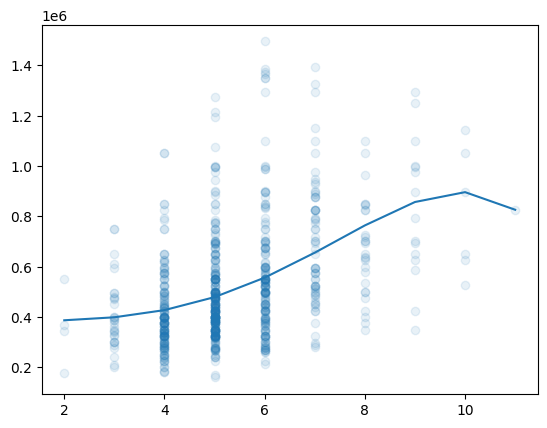

In [121]:
ridgemodel(x_train, y_train, x_test, y_test)

All the modelings will have a bunch of yapping warnings and I don't know how to shut it off, so bear with me here. I could go deep into the packages andd delete the warning, but I would be risking screwing the entire program.

MSE:  41973105861.8677
R2:  0.18622547009344115
Lambda:  100000.0
Coefs:  [  0.           0.          88.73367344 234.15476149 -19.14834425]
intercept:  382065.02516378346


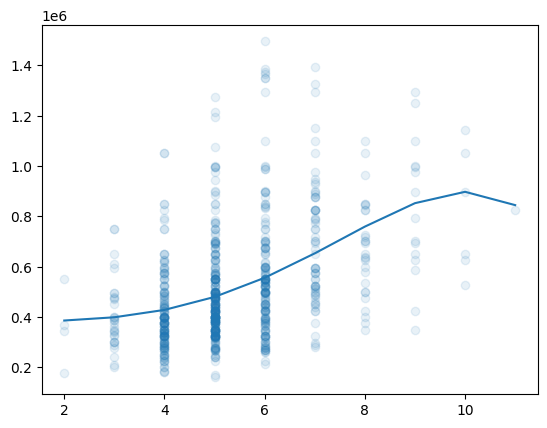

In [122]:
lassomodel(x_train, y_train, x_test, y_test)

MSE:  42736289401.008156
R2:  0.17142886848286853
Lambda:  100000.0
Coefs:  [  0.           3.01798385  26.55050387 129.20926288  -8.02699894]
intercept:  425855.206397264


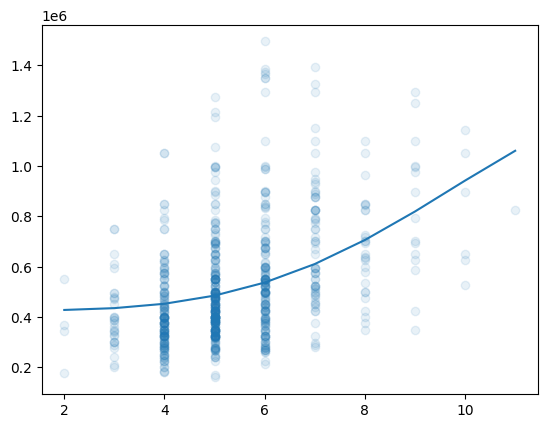

In [123]:
enetmodel(x_train, y_train, x_test, y_test)

There appears to be a weak correlation with the model predictions based off room count and the actual house prices. Not non existent but it's there.

### Energy Label ###

In [124]:
x_data = x_datax['Energy label'] #Filtering out other variables
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, #Creating train and test datasets
                                                    random_state=randy, shuffle = True)

MSE:  51089809258.14077
R2:  0.009470834755871183
Lambda:  500.0
Coefs:  [  -79.24449633 -1034.1349544  -3946.08549185   722.12907512
   -33.98441241]
intercept:  734485.6254114865


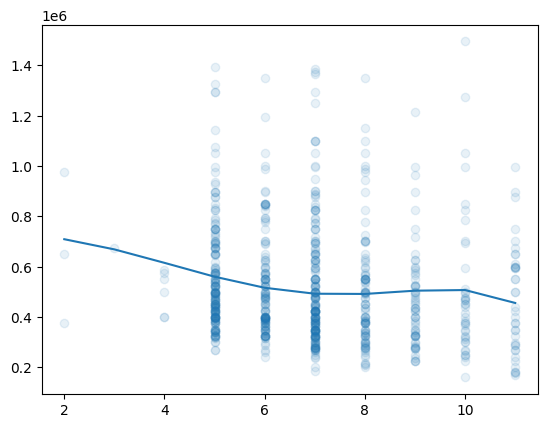

In [125]:
ridgemodel(x_train, y_train, x_test, y_test)

MSE:  51039542348.527374
R2:  0.010445409543715423
Lambda:  10.0
Coefs:  [-1.56993745e+05  8.76176715e+03  4.18296658e+02 -5.01327811e-01
 -3.06021194e+00]
intercept:  1077261.107193369


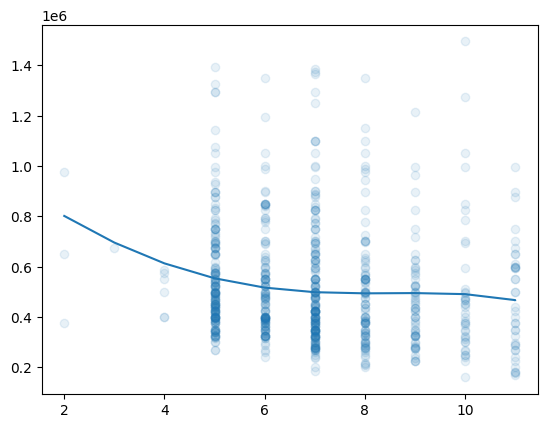

In [126]:
lassomodel(x_train, y_train, x_test, y_test)

MSE:  50931130292.32749
R2:  0.012547302369102287
Lambda:  50000.0
Coefs:  [ -0.          -1.45548499 -12.19283043 -42.24531665   3.44867419]
intercept:  560024.8166591836


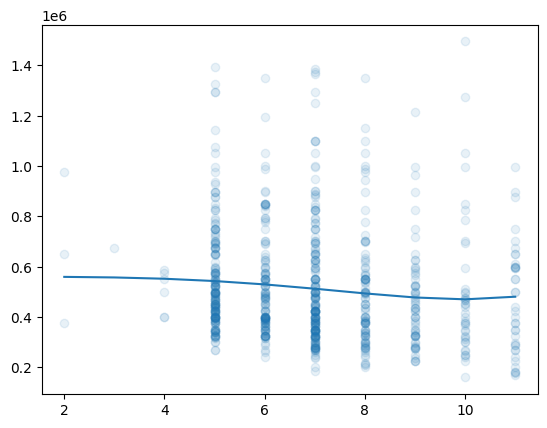

In [127]:
enetmodel(x_train, y_train, x_test, y_test)

No correlation with predictions from energy labels and house prices.

### House area ###

In [128]:
x_data = x_datax['Living space size (m2)'] #Filtering out other variables
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, #Creating train and test datasets
                                                    random_state=randy, shuffle = True)



c:\Users\nicks\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.22999e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\nicks\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.89963e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\nicks\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.25545e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\nicks\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.97689e-25): result may not be accurate.
  return linalg.solve(A, 

MSE:  25325150661.729397
R2:  0.5089960070530608
Lambda:  100000.0
Coefs:  [-2.45862163e+02  5.87700350e+00  1.97052576e-01 -1.02328161e-03
  1.33606909e-06]
intercept:  220824.0665735


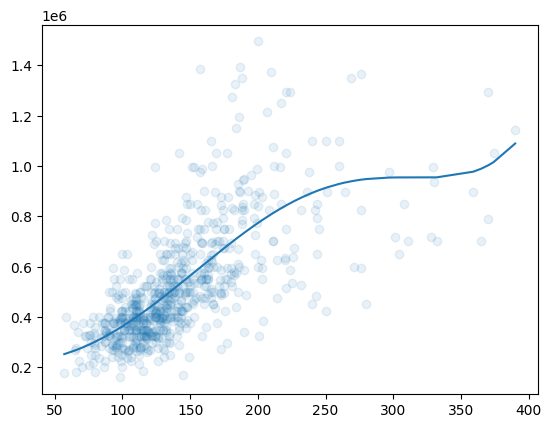

In [129]:
ridgemodel(x_train, y_train, x_test, y_test)

MSE:  25766236593.442352
R2:  0.5004442334981234
Lambda:  50000.0
Coefs:  [-0.00000000e+00  3.22035153e+01 -7.53081338e-02 -8.61026867e-05
  2.83327735e-07]
intercept:  120691.45564898191


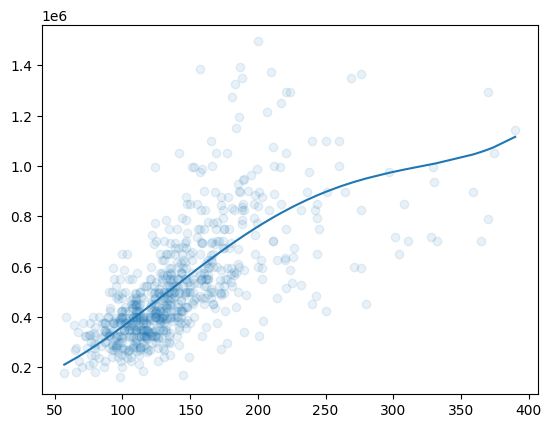

In [130]:
lassomodel(x_train, y_train, x_test, y_test)

MSE:  25733967257.680355
R2:  0.5010698713440941
Lambda:  50000.0
Coefs:  [-0.00000000e+00  3.29699449e+01 -7.89454835e-02 -8.53824674e-05
  2.93291812e-07]
intercept:  115629.13557759067


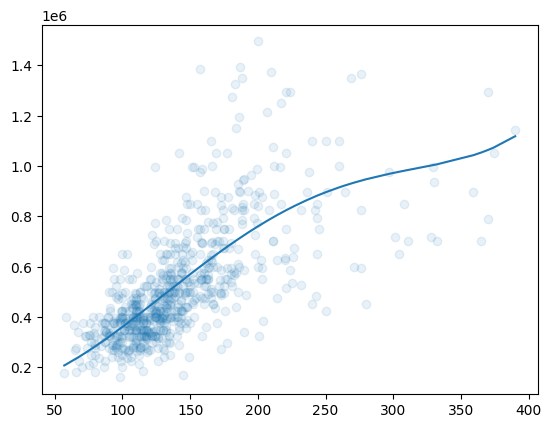

In [131]:
enetmodel(x_train, y_train, x_test, y_test)

Very significant correlation between predictions based off of house area and house prices. Is by far the strongest relation of the variables.

### Toilets ###

In [132]:
x_data = x_datax['Toilet'] #Filtering out other variables
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, #Creating train and test dataseets
                                                    random_state=randy, shuffle = True)

MSE:  38899768973.12129
R2:  0.24581132228448044
Lambda:  100000.0
Coefs:  [ 122.37027282  588.58223489 1800.18276357 3547.38769244 -579.99104213]
intercept:  412613.73813755985


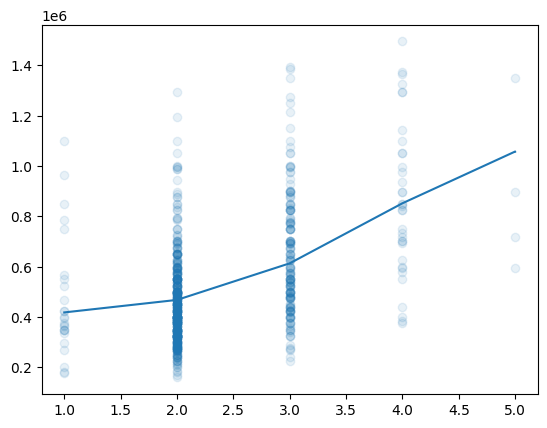

In [133]:
ridgemodel(x_train, y_train, x_test, y_test)

MSE:  38965102723.841736
R2:  0.24454463159796003
Lambda:  100000.0
Coefs:  [   0.            0.            0.         4254.82961704 -644.39803022]
intercept:  421042.4990162386


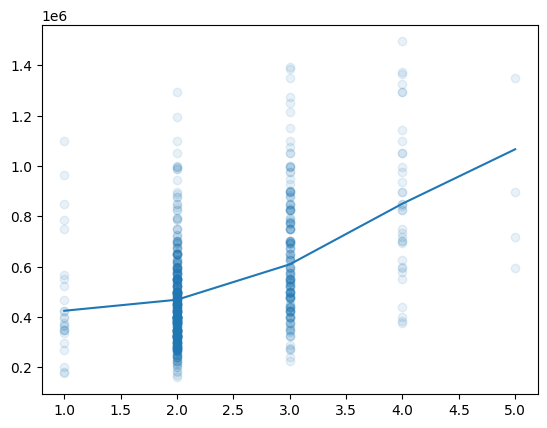

In [134]:
lassomodel(x_train, y_train, x_test, y_test)

MSE:  44546091567.61673
R2:  0.13634042608352326
Lambda:  50000.0
Coefs:  [  0.42676964   5.98667109  24.33321048  73.86188607 144.2425127 ]
intercept:  490085.6720529966


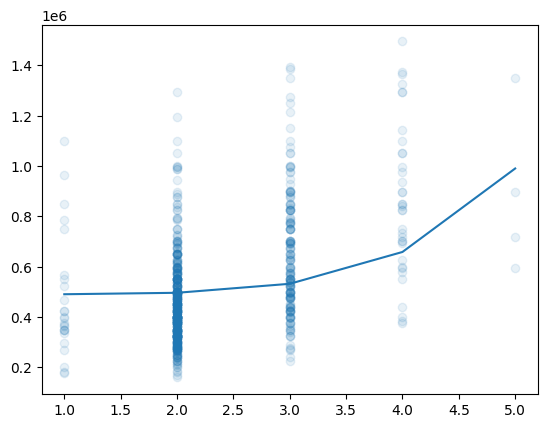

In [135]:
enetmodel(x_train, y_train, x_test, y_test)

Weak, but existent correlation between prediction based off of toilets and actual house prices.

### Combining variables ###

This time we'll take the rooms, toilet, andd living space variable, since they all have at least something of a correlation. Energy label is left out because of no correlation

In [136]:
x_data = x_datax
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, #Creating train and test datasets
                                                    random_state=randy, shuffle = True)

x_train = x_train[['Rooms', 'Toilet', 'Living space size (m2)']] #Getting all variables, Energy label has no correlation
x_test = x_test[['Rooms', 'Toilet','Living space size (m2)']] 



xvarstrain, yvartrain = makedataframe2(x_train, y_train) #Polynomializing xvars
xvarstest, yvartest = makedataframe2(x_test, y_test)

In [137]:
alphas = (.0001, .001, .01, .1, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000)

Ridge_model = RidgeCV(alphas=alphas, cv = 5).fit(xvarstrain, yvartrain)

ypred = Ridge_model.predict(xvarstest)
ypred = ypred.flatten() #I don't know why I'm suddenly getting arrays of arrays with many dimensions, so I gotta flatten it.

print("MSE: ",mean_squared_error(yvartest['Price'], ypred))
print('R2: ', r2_score(yvartest['Price'],ypred))
print('Lambda: ', Ridge_model.alpha_)
print('Coefs: ', Ridge_model.coef_)

c:\Users\nicks\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.01222e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\nicks\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.67936e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\nicks\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.74355e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\nicks\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.84208e-31): result may not be accurate.
  return linalg.solve(A, 

MSE:  23655545629.40787
R2:  0.5413663075683113
Lambda:  50.0
Coefs:  [[-6.50373803e+03 -6.23070875e+03 -1.16005986e+04 -6.50373803e+03
  -1.57571100e+04  4.09912944e+03 -3.80670142e+02  1.24457635e+01
  -6.23070875e+03 -4.47334047e+03  2.95645161e+03  1.44871149e+03
  -2.93311661e+02 -1.16005986e+04  2.61617150e+02 -1.11659633e+00
   2.07793992e-03 -1.38066052e-06]]


c:\Users\nicks\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.31976e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\nicks\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.21573e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\nicks\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.8468e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\nicks\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.92259e-23): result may not be accurate.
  return linalg.solve(A, X

In [138]:
alphas = (.0001, .001, .01, .1, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000)

lasso_model = LassoCV(alphas=alphas, cv = 5).fit(xvarstrain, yvartrain)

ypred = lasso_model.predict(x_test)
ypred = ypred.flatten()

print("MSE: ",mean_squared_error(yvartest['Price'], ypred))
print('R2: ', r2_score(yvartest['Price'],ypred))
print('Lambda: ', lasso_model.alpha_)
print('Coefs: ', lasso_model.coef_)


MSE:  24230477096.61932
R2:  0.5302195369195484
Lambda:  0.0001
Coefs:  [-7.89419359e+03  1.17040246e+04  3.91062111e+03 -9.29141988e+04
  8.51206616e+03  1.31228620e+02 -1.62174502e+01 -1.19398491e+00
 -1.33719411e+05  3.52134943e+04  2.10841462e+03 -1.50272823e+02
 -1.11480647e+02 -2.55615501e+02  9.10107100e+00 -3.37057304e-02
 -5.67562700e-05  1.81708997e-07]


In [139]:
alphas = (.0001, .001, .01, .1, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000)

enet_model = ElasticNetCV(alphas=alphas, cv = 5).fit(xvarstrain, yvartrain)

ypred = enet_model.predict(x_test)
ypred = ypred.flatten()

print("MSE: ",mean_squared_error(yvartest['Price'], ypred))
print('R2: ', r2_score(yvartest['Price'],ypred))
print('Lambda: ', enet_model.alpha_)
print('Coefs: ', enet_model.coef_)

MSE:  24231816692.199017
R2:  0.5301935648419347
Lambda:  0.0001
Coefs:  [-1.02009171e+04  2.69813931e+03  4.00610839e+03 -8.99398375e+04
  8.38884812e+03  1.38384458e+02 -1.60529731e+01 -1.21351137e+00
 -1.22325093e+05  3.41294315e+04  2.27274601e+03 -1.47818124e+02
 -1.13094318e+02 -3.53336778e+02  9.11283260e+00 -3.37171350e-02
 -5.67913505e-05  1.81763835e-07]


The prediction with the three variables combined is slightly better than the prediction from house area, since the correlations would usually go up a few percentage points with all combined. It is however a possible indicator that house size also has a very strong relation with the other variables, which overall makes sense since rooms and toilets need space.
It also appears enet models, despite the claims that they tend to get the best of both Lasso and Ridge regression, has not improved significantly. One factor might be that I've made the models polynomial, but I am not sure about that.

Another curious observation I have noticed is that lambda appears to tend to fall into the extreme high end for single vairable polynomials, if there is a trend to it. For multivariates the lambda isn't falling into extreme ends as much.

I also happen to notice that the lasso models did nullify some variables, but I'm surprised that it didn't do it as much as I thought it would.